In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\hanee\Desktop\PYTHON\weight_data.csv")
data

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [3]:
data.size

218

In [4]:
data.isna().sum()

Waist    0
AT       0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1f495e95bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f495e975d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f495e84310>],
 'medians': [<matplotlib.lines.Line2D at 0x1f495ea0e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f495ea1850>],
 'means': []}

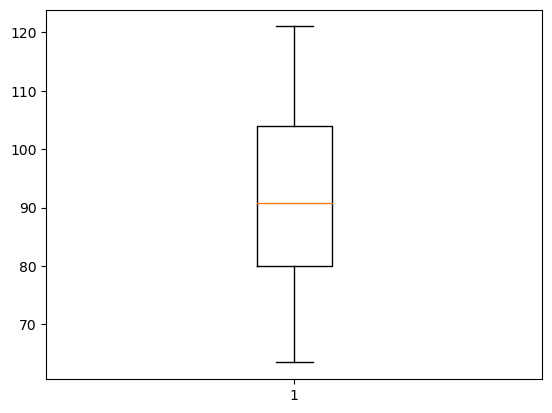

In [5]:
plt.boxplot(data.Waist)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f495ea3050>,
 'caps': [<matplotlib.lines.Line2D at 0x1f495f76c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f495f749d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f495f80190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f495f80c10>],
 'means': []}

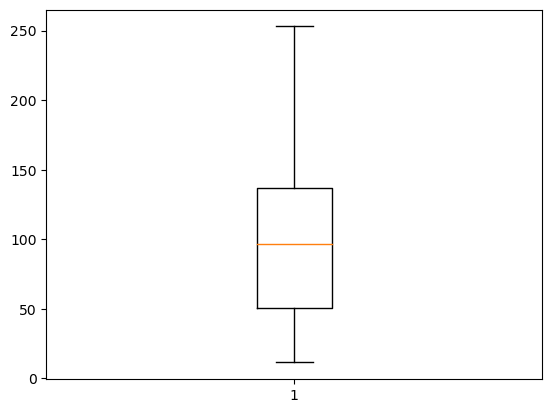

In [6]:
plt.boxplot(data.AT)

<BarContainer object of 109 artists>

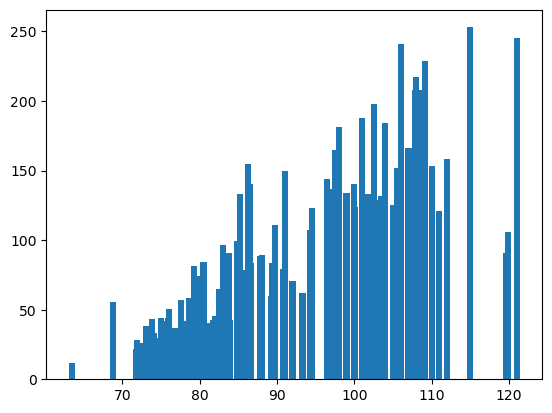

In [7]:
plt.bar(height = data.AT, x = data.Waist)

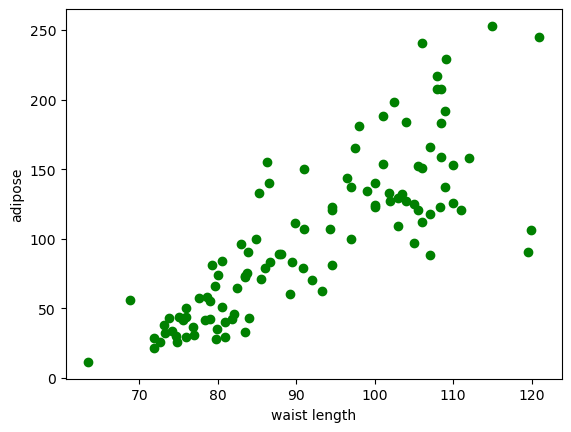

In [8]:
plt.scatter(x = data['Waist'], y = data['AT'], color = 'green')
plt.xlabel("waist length")
plt.ylabel("adipose")
plt.show()

In [9]:
np.corrcoef(data.Waist, data.AT)

array([[1.        , 0.81855781],
       [0.81855781, 1.        ]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(data[["Waist"]],data.AT,test_size=0.1)

In [12]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(X_train,Y_train)

In [13]:
reg.score(X_test,Y_test)

0.741171351043602

In [14]:
reg.predict(X_test)

array([153.52154626, 155.5196063 ,  33.47143846, 127.54676565,
        96.57683493,  43.12872868, 145.52930607,  77.92827449,
       130.54385572,  37.63406355, 155.5196063 ])

In [15]:
print(Y_test)

107    208.00
87     159.00
5       21.68
104    124.00
32      78.94
0       25.72
91     152.00
52     133.00
103    188.00
12      38.21
108    208.00
Name: AT, dtype: float64


In [16]:
#CORRELATION COEFFICIENT
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])
correlation_matrix=np.corrcoef(x,y)
print(correlation_matrix)

[[1. 1.]
 [1. 1.]]


In [17]:
#CORRELATION COEFFICIENT
x=np.array([1,2,3,4,5])
y=np.array([10,8,6,4,2])
correlation_matrix=np.corrcoef(x,y)
print(correlation_matrix)

[[ 1. -1.]
 [-1.  1.]]


In [18]:
#smf-stastistical model,ols-ordinary least square
model = smf.ols('AT ~ Waist', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           1.62e-27
Time:                        09:52:36   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
pred1 = model.predict(pd.DataFrame(data['Waist']))

In [20]:
print([data.Waist[12:20],data.AT[12:20],pred1[12:20]])

[12    73.10
13    79.00
14    77.00
15    68.85
16    75.95
17    74.15
18    73.80
19    75.90
Name: Waist, dtype: float64, 12    38.21
13    42.48
14    30.96
15    55.78
16    43.78
17    33.41
18    43.35
19    29.31
Name: AT, dtype: float64, 12    36.861134
13    57.268404
14    50.350685
15    22.160981
16    46.718883
17    40.492936
18    39.282335
19    46.545940
dtype: float64]


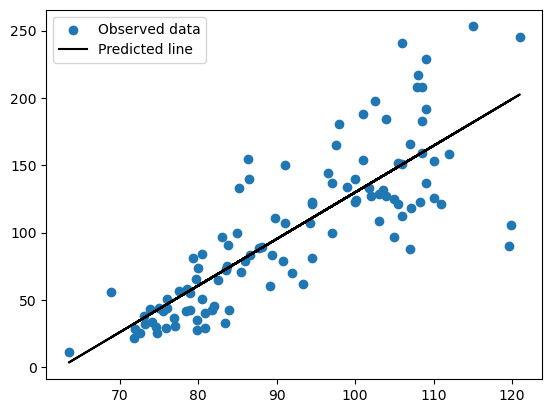

In [21]:
plt.scatter(data.Waist, data.AT)
plt.plot(data.Waist, pred1,"black")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

In [23]:
res1 = data.AT - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

32.760177495755144

In [24]:
x=np.array([1,2,3,4,5])
y=np.array([10,8,6,4,2])
correlation_matrix=np.corrcoef(x,y)
print(correlation_matrix)

[[ 1. -1.]
 [-1.  1.]]


In [27]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2)
finalmodel = smf.ols('AT ~ Waist', data = data).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           1.62e-27
Time:                        09:53:44   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_AT = np.exp(test_pred)
pred_test_AT

98     7.894314e+42
83     2.771717e+74
106    1.320325e+59
4      2.172403e+18
84     1.531710e+69
21     5.314502e+27
101    1.220323e+70
31     3.475683e+38
62     1.183267e+26
91     4.771840e+64
24     2.386945e+29
11     7.289499e+18
15     4.211064e+09
66     1.442826e+51
10     1.606907e+14
45     1.208224e+67
3      2.027969e+32
93     1.428522e+48
29     1.345626e+30
1      1.809277e+15
55     1.864174e+24
14     7.362491e+21
dtype: float64

almost perftect for a  linear regression
-o.5 to -1
0.5  to 1